TP 1


Exercice 1:

<Figure size 800x350 with 0 Axes>

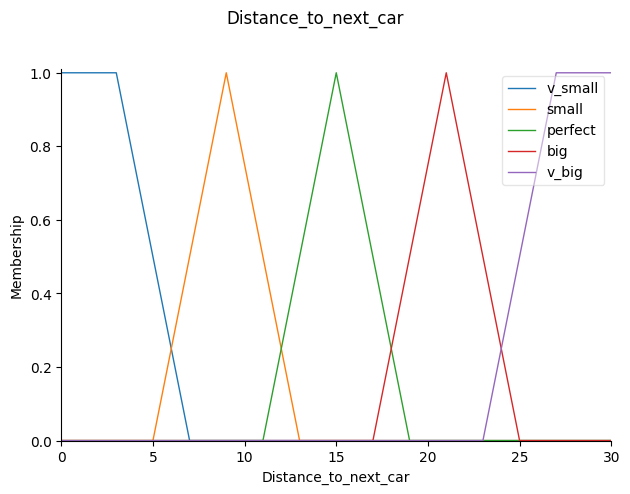

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

distance_universe = np.linspace(0, 30, 301)
Distance = ctrl.Antecedent(distance_universe, 'Distance_to_next_car')

# Ensembles flous pour Distance 
Distance['v_small'] = fuzz.trapmf(distance_universe, [0.0, 0.0, 3.0, 7.0])  
Distance['small']   = fuzz.trimf(distance_universe, [5.0, 9.0, 13.0])        
Distance['perfect'] = fuzz.trimf(distance_universe, [11.0, 15.0, 19.0])     
Distance['big']     = fuzz.trimf(distance_universe, [17.0, 21.0, 25.0])     
Distance['v_big']   = fuzz.trapmf(distance_universe, [23.0, 27.0, 30.0, 30.0])

# Trace
plt.figure(figsize=(8, 3.5))
Distance.view()
plt.suptitle('Distance_to_next_car', y=1.02)
plt.tight_layout()

Exercice 2:

<Figure size 800x350 with 0 Axes>

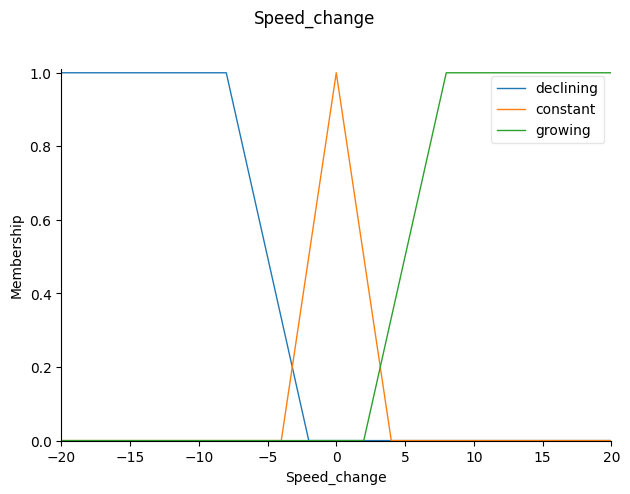

In [7]:
speed_universe = np.linspace(-20, 20, 401)
Speed = ctrl.Antecedent(speed_universe, 'Speed_change')

# Ensembles flous pour Speed_change
Speed['declining'] = fuzz.trapmf(speed_universe, [-20.0, -20.0, -8.0, -2.0])   # en diminution
Speed['constant']  = fuzz.trimf(speed_universe, [-4.0, 0.0, 4.0])               # stable
Speed['growing']   = fuzz.trapmf(speed_universe, [2.0, 8.0, 20.0, 20.0])       # en augmentation

# Trace
plt.figure(figsize=(8, 3.5))
Speed.view()
plt.suptitle('Speed_change', y=1.02)
plt.tight_layout()


Exercice 3 :

<Figure size 800x350 with 0 Axes>

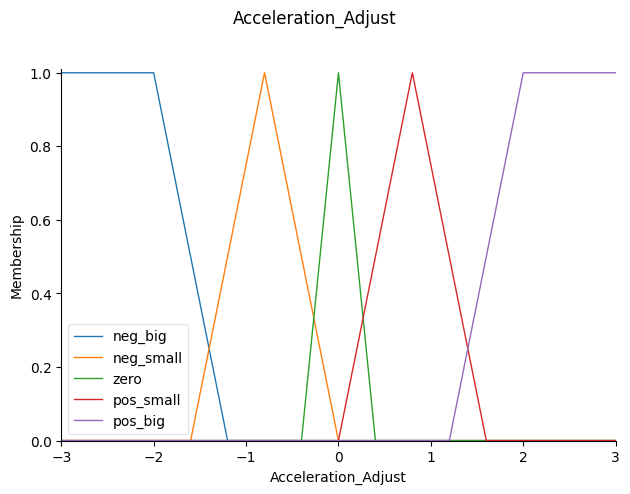

In [8]:
acc_universe = np.linspace(-3, 3, 301)
Acceleration = ctrl.Consequent(acc_universe, 'Acceleration_Adjust')

# Ensembles flous pour Acceleration_Adjust
Acceleration['neg_big']   = fuzz.trapmf(acc_universe, [-3.0, -3.0, -2.0, -1.2])  # forte décélération
Acceleration['neg_small'] = fuzz.trimf(acc_universe, [-1.6, -0.8, 0.0])          # faible décélération
Acceleration['zero']      = fuzz.trimf(acc_universe, [-0.4, 0.0, 0.4])           # aucune variation
Acceleration['pos_small'] = fuzz.trimf(acc_universe, [0.0, 0.8, 1.6])            # faible accélération
Acceleration['pos_big']   = fuzz.trapmf(acc_universe, [1.2, 2.0, 3.0, 3.0])      # forte accélération

# Trace
plt.figure(figsize=(8, 3.5))
Acceleration.view()
plt.suptitle('Acceleration_Adjust', y=1.02)
plt.tight_layout()

Exercice 4 :

Entrées : Distance_to_next_car = 13.0, Speed_change = -2.5
Sortie défluzzifiée Acceleration_Adjust = 0.2809


<Figure size 800x350 with 0 Axes>

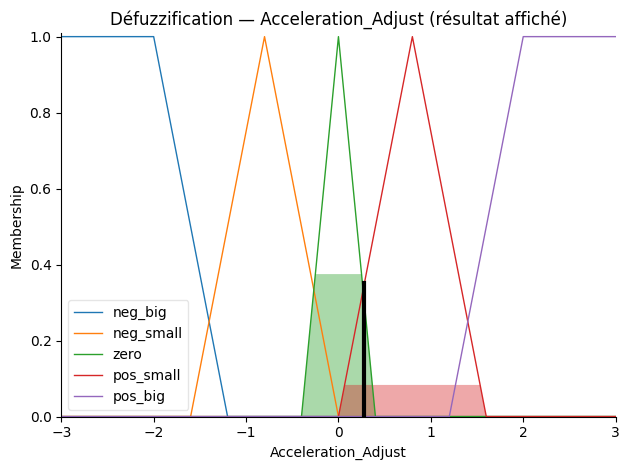

In [9]:
rules = []
# Distance v_small
rules.append(ctrl.Rule(Distance['v_small'] & Speed['declining'],  Acceleration['neg_small']))
rules.append(ctrl.Rule(Distance['v_small'] & Speed['constant'],   Acceleration['neg_big']))
rules.append(ctrl.Rule(Distance['v_small'] & Speed['growing'],    Acceleration['neg_big']))

# Distance small
rules.append(ctrl.Rule(Distance['small'] & Speed['declining'],    Acceleration['zero']))
rules.append(ctrl.Rule(Distance['small'] & Speed['constant'],     Acceleration['neg_small']))
rules.append(ctrl.Rule(Distance['small'] & Speed['growing'],      Acceleration['neg_big']))

# Distance perfect
rules.append(ctrl.Rule(Distance['perfect'] & Speed['declining'],  Acceleration['pos_small']))
rules.append(ctrl.Rule(Distance['perfect'] & Speed['constant'],   Acceleration['zero']))
rules.append(ctrl.Rule(Distance['perfect'] & Speed['growing'],    Acceleration['neg_small']))

# Distance big
rules.append(ctrl.Rule(Distance['big'] & Speed['declining'],      Acceleration['pos_big']))
rules.append(ctrl.Rule(Distance['big'] & Speed['constant'],       Acceleration['pos_small']))
rules.append(ctrl.Rule(Distance['big'] & Speed['growing'],        Acceleration['zero']))

# Distance v_big
rules.append(ctrl.Rule(Distance['v_big'] & Speed['declining'],     Acceleration['pos_big']))
rules.append(ctrl.Rule(Distance['v_big'] & Speed['constant'],     Acceleration['pos_big']))
rules.append(ctrl.Rule(Distance['v_big'] & Speed['growing'],      Acceleration['pos_small']))

# Construction du système
acc_ctrl = ctrl.ControlSystem(rules)
acc_sim  = ctrl.ControlSystemSimulation(acc_ctrl)

# 2. Simulation pour :
input_distance = 13.0
input_speed_change = -2.5

acc_sim.input['Distance_to_next_car'] = input_distance
acc_sim.input['Speed_change'] = input_speed_change

# 3. Calcul et affichage
acc_sim.compute()

output_value = acc_sim.output['Acceleration_Adjust']
print(f"Entrées : Distance_to_next_car = {input_distance}, Speed_change = {input_speed_change}")
print(f"Sortie défluzzifiée Acceleration_Adjust = {output_value:.4f}")

# Visualisation de la défuzzification
plt.figure(figsize=(8, 3.5))
Acceleration.view(sim=acc_sim)
plt.title('Défuzzification — Acceleration_Adjust (résultat affiché)')
plt.tight_layout()
plt.show()

TP 2

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


#1
n_samples = 1000
X_distance = np.random.uniform(0, 30, n_samples)
X_speed = np.random.uniform(-20, 20, n_samples)
y_acc = []

for d, s in zip(X_distance, X_speed):
    acc_sim.input['Distance_to_next_car'] = d
    acc_sim.input['Speed_change'] = s
    acc_sim.compute()
    y_acc.append(acc_sim.output['Acceleration_Adjust'])

# Création d'un DataFrame
df = pd.DataFrame({
    'Distance_to_next_car': X_distance,
    'Speed_change': X_speed,
    'Acceleration_Adjust': y_acc
})

#2
X = df[['Distance_to_next_car', 'Speed_change']].values
y = df['Acceleration_Adjust'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#3
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nÉvaluation du modèle ML :")
print(f"Erreur absolue moyenne (MAE) = {mae:.4f}")
print(f"Erreur quadratique moyenne (MSE) = {mse:.4f}")

# 4-5
print("\nComparaison :")
print("- Logique floue : facilement interprétable, règles explicites, robuste aux valeurs extrêmes.")
print("- ML : plus précis sur de grandes quantités de données, capable de capturer des patterns complexes non linéaires.")



Évaluation du modèle ML :
Erreur absolue moyenne (MAE) = 0.0213
Erreur quadratique moyenne (MSE) = 0.0028

Comparaison :
- Logique floue : facilement interprétable, règles explicites, robuste aux valeurs extrêmes.
- ML : plus précis sur de grandes quantités de données, capable de capturer des patterns complexes non linéaires.
